### Objective

* Recap : Objective of PCA
* Implement PCA using NumPy on IRIS data
* Implement PCA using scikit-learn on IRIS data
* Comparing both
* Implement our own PCA class
* Introduction to LDA
* PCA vs LDA

<hr>

### Objective of PCA
* Finding the directions of maximum variance in high-dimensional dataset & project original data onto a smaller dimension subspace while retaining most important information.

### PCA Algorithm
* Doesn't consider class/target information.
* Standardize the dataset
* Obtain Eigenvectors & Eigenvalues from covariance matrix.
* Eignvectors represent new principal axis based on variance of the data.
* Maginitude of the Eignvectors is known as Eignvalues.
* Eignvectors or principal axes with higher values means more important principal axes
* Sort the eginvectors based on eignvalues. Choose n_components vectors
* Generate projection matrix.
* Use projection matrix to transform data

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
feature = iris.data

In [4]:
feature.shape

(150, 4)

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
target = iris.target

### 1. Standaradize the dataset

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
ss = StandardScaler()

In [11]:
feature_std = ss.fit_transform(feature)

### 2. Compute Eignvectors & Eignvalues of covariance matrix

In [12]:
import numpy as np

* Covariance of matrix is calculated is how is one feature realted to another feature

In [16]:
cov_mat = np.cov(feature_std.T)

In [17]:
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [19]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [20]:
eig_vals

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [21]:
eig_vecs

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

### 3. Calculate a projection matrix
* This will be the matrix used to transform the iris data onto new feature subspace
* We want to take top two principal axes

In [25]:
matrix_w = eig_vecs[:,:2]

In [26]:
matrix_w

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

### 4. Transform data to new subsapce 

In [28]:
feature_pca = feature_std.dot(matrix_w)

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

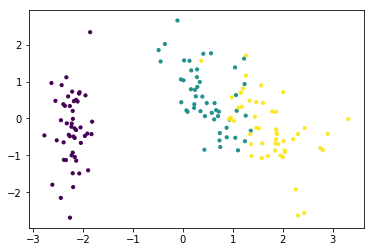

In [31]:
plt.scatter(feature_pca[:,0], feature_pca[:,1],c=target, s=10)

### 5. Validating sklearn

In [32]:
from sklearn.decomposition import PCA

/home/awantik/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [33]:
pca = PCA(n_components=2)

In [34]:
feature_skpca = pca.fit_transform(feature_std)

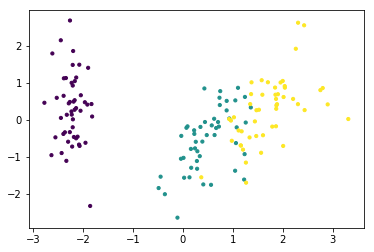

In [35]:
plt.scatter(feature_skpca[:,0], feature_skpca[:,1],c=target, s=10)

In [36]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [37]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

### 6. Implement PCA class

In [38]:
class MyPCA:
    
    def __init__(self,n_components=2):
        self.n_components = n_components
        
    def fit(self, feature):
        cov_mat = np.cov(feature.T)
        self.eig_vals, self.eig_vecs = np.linalg.eig(cov_mat)
        self.projection_matrix = self.eig_vecs[:,:self.n_components] 
        
    def transform(self,feature):
        return feature.dot(self.projection_matrix)

In [40]:
mypca = MyPCA(n_components=2)
mypca.fit(feature_std)

In [42]:
mypca.transform(feature_std)[:5]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538]])

In [43]:
mypca.eig_vals

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [44]:
feature_skpca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

* LDA ( Linear Discriminant Analysis) also transforms the data but considers class information of the data

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [46]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [49]:
feature_lda = lda.fit_transform(feature_std, target)

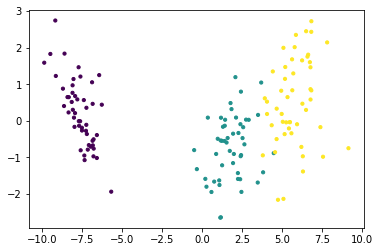

In [50]:
plt.scatter(feature_lda[:,0], feature_lda[:,1],c=target, s=10)

### Important Points
* Both PCA & LDA are linear transformation
* LDA is supervised
* PCA is unsupervised
* LDA attends a subspace that maximizes class separability 
* Number of components can be decided using GridSearch
* PCA's objective is denoising & dimensionality reduction
* LDA's objective is to make data ready for classifier

In [51]:
from sklearn.pipeline import make_pipeline

In [54]:
from sklearn.linear_model import LogisticRegression

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
trainX, testX, trainY, testY = train_test_split(feature_std, target)

In [55]:
pca_pipeline = make_pipeline(PCA(n_components=2),LogisticRegression())

In [57]:
lda_pipeline = make_pipeline(LinearDiscriminantAnalysis(n_components=2),LogisticRegression())

In [58]:
pca_pipeline.fit(trainX, trainY)

/home/awantik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/awantik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [59]:
lda_pipeline.fit(trainX,trainY)

/home/awantik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/awantik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('lineardiscriminantanalysis',
                 LinearDiscriminantAnalysis(n_components=2, priors=None,
                                            shrinkage=None, solver='svd',
                                            store_covariance=False,
                                            tol=0.0001)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [60]:
pca_pipeline.score(testX,testY)

0.7631578947368421

In [61]:
lda_pipeline.score(testX,testY)

0.868421052631579

* Observation : LDA is making data more aware for classification
* For very high dimensional datset, PCA may start working well. So, check before concluding